# Exercício 1
Utilize o método da projeção para determinar a aproximação da função $f = sen(z \pi)$ no intervalo $-2 < x < 2$ utilizando as funções $1$, $x^2$, $x^3$, $x^4$, $x^5$. Considere $z = 1 + \frac{0.5N}{19}$. Apresente os gráficos da aproximação junto com a função dada.

## Resolução



A função que iremos aproximar é da forma:

$$
f = sen(z \pi x)
$$

Temos que:

$$
z = 1 + \frac{0.5 N}{19} \\
N = 0 \Rightarrow z = 1
$$

Portanto:

$$
f = sen(\pi x)
$$

### Calculando Coeficientes

Para calcular os coeficientes devemos resolver o sistema linear na forma:

$$
A \bold{c} = \bold{b}
$$

onde:

* $A$ é a matriz tal que $A_{ij} = \langle \phi_i, \phi_j \rangle$;
* $\bold{b}$ é o vetor dado por $\langle f, \phi_i \rangle$;
* $\bold{c}$ é o vetor de coeficientes.

In [51]:
import sympy as sp
import numpy as np

def f(x):
    return sp.sin(np.pi * x)

x = sp.symbols('x')

A = sp.zeros(6,6)
b = sp.zeros(6,1)
c = sp.zeros(6,1)

for i in range(6):
    b[i] = sp.integrate(f(x) * (x**i), (x, -2, 2))
    for j in range(6):
        A[i,j] = sp.integrate((x**i) * (x**j), (x, -2, 2))

c = A.inv() * b
display(c)

Matrix([
[                0],
[  2.0081971637608],
[                0],
[-2.23285228459836],
[                0],
[0.453821069426289]])

### Aproximação

In [57]:
def sol_approx(x):
    return sum(c[i] * x**i for i in range(6))

x, i = sp.symbols('x i')
display(sum(c[i] * x**i for i in range(6)))

0.453821069426289*x**5 - 2.23285228459836*x**3 + 2.0081971637608*x

## Resultados

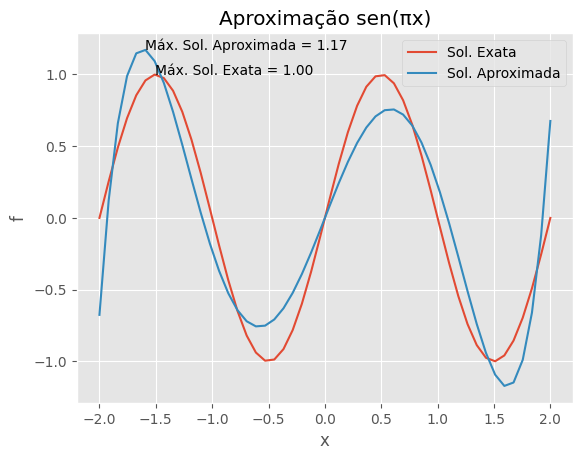

In [55]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

def sol_exata(x):
    return np.sin(np.pi * x)

x = np.linspace(-2, 2)

plt.plot(x, sol_exata(x), label='Sol. Exata')
max_y_exata = max(sol_exata(x))
max_x_exata = x[np.where(sol_exata(x) == max_y_exata)]
plt.annotate(f'Máx. Sol. Exata = {max_y_exata:.2f}', (max_x_exata,max_y_exata))

plt.plot(x, sol_approx(x), label='Sol. Aproximada')
max_y_approx = max(sol_approx(x))
max_x_approx = x[np.where(sol_approx(x) == max_y_approx)]
plt.annotate(f'Máx. Sol. Aproximada = {max_y_approx:.2f}', (max_x_approx, max_y_approx))

plt.title('Aproximação sen(πx)')
plt.xlabel('x')
plt.ylabel('f')
plt.legend()
plt.show()